### Importing modules

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
os.chdir(r'C:\Users\ARNAB NATH\Desktop\Python ML\Datasets')

### Loading datasets

In [2]:
df = pd.read_csv('TaxiFare.csv')
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


### Managing incorrect data
### Amount cant be negative

In [3]:
df = df[df['amount'] >= 0]
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


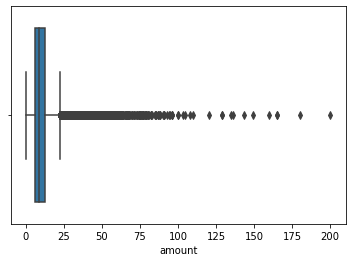

In [4]:
sns.boxplot(data = df,x = 'amount')
plt.show()

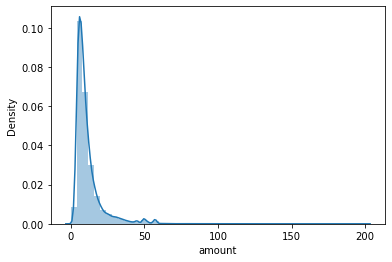

In [5]:
sns.distplot(df['amount'])
plt.show()

In [6]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,49994.000000,49994.000000,49994.000000,49994.000000,49994.000000,49994.000000
mean,11.365903,-72.509586,39.933665,-72.505922,39.926970,1.667860
std,9.684843,10.394472,6.225225,10.403131,6.012441,1.289213
min,0.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734883,-73.991152,40.734375,1.000000
50%,8.500000,-73.981840,40.752679,-73.980082,40.753373,1.000000
75%,12.500000,-73.967153,40.767361,-73.963585,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49994 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             49994 non-null  object 
 1   amount                49994 non-null  float64
 2   date_time_of_pickup   49994 non-null  object 
 3   longitude_of_pickup   49994 non-null  float64
 4   latitude_of_pickup    49994 non-null  float64
 5   longitude_of_dropoff  49994 non-null  float64
 6   latitude_of_dropoff   49994 non-null  float64
 7   no_of_passenger       49994 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.4+ MB


In [8]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [9]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

### Fare amount may vary depending on year based on other economic factors

In [10]:
df['Year'] = df['date_time_of_pickup'].str[:4].astype(int)
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010
...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,2013
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,2015
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,2011
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,2012


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49994 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             49994 non-null  object 
 1   amount                49994 non-null  float64
 2   date_time_of_pickup   49994 non-null  object 
 3   longitude_of_pickup   49994 non-null  float64
 4   latitude_of_pickup    49994 non-null  float64
 5   longitude_of_dropoff  49994 non-null  float64
 6   latitude_of_dropoff   49994 non-null  float64
 7   no_of_passenger       49994 non-null  int64  
 8   Year                  49994 non-null  int32  
dtypes: float64(5), int32(1), int64(1), object(2)
memory usage: 3.6+ MB


### Unique id does not contribute to amount

In [12]:
df = df.drop('unique_id',axis = 1)
df = df.drop('date_time_of_pickup',axis = 1)

In [13]:
df[df['no_of_passenger'] == 0].count()

amount                  165
longitude_of_pickup     165
latitude_of_pickup      165
longitude_of_dropoff    165
latitude_of_dropoff     165
no_of_passenger         165
Year                    165
dtype: int64

### Obtaining correlation matrix to find how much each variable correlates with dependent variable

In [14]:
corr = df.corr()
corr

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year
amount,1.000000,0.005921,-0.007317,0.004467,-0.005615,0.016562,0.121032
longitude_of_pickup,0.005921,1.000000,-0.950587,0.956613,-0.947401,-0.005606,-0.001268
latitude_of_pickup,-0.007317,-0.950587,1.000000,-0.911581,0.928614,0.003239,-0.001349
longitude_of_dropoff,0.004467,0.956613,-0.911581,1.000000,-0.982102,-0.004866,-0.000330
latitude_of_dropoff,-0.005615,-0.947401,0.928614,-0.982102,1.000000,0.002891,-0.001814
no_of_passenger,0.016562,-0.005606,0.003239,-0.004866,0.002891,1.000000,0.006372
Year,0.121032,-0.001268,-0.001349,-0.000330,-0.001814,0.006372,1.000000


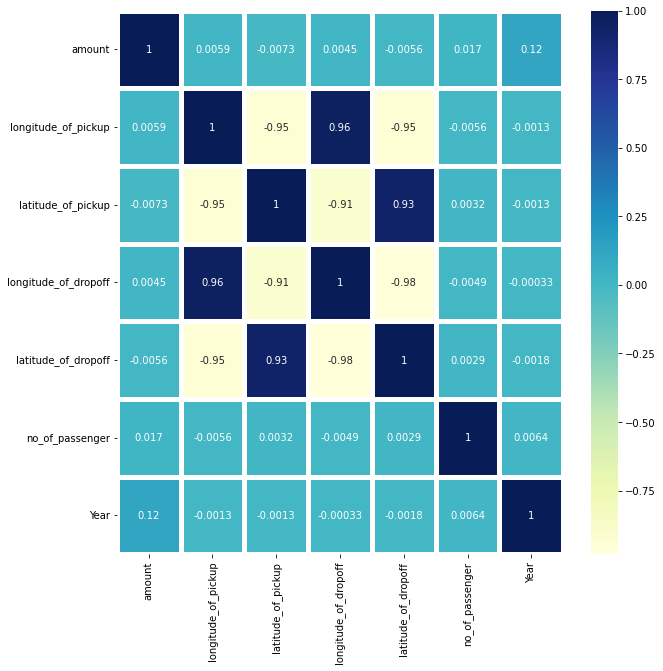

In [15]:
plt.figure(figsize = (10,10))
sns.heatmap(corr,annot=True,cmap="YlGnBu",linewidths=5)
plt.show()

### Fare will depend on distance travelled not on start and end loactions

In [16]:
df['lat_dist'] = abs(df['latitude_of_dropoff'] - df['latitude_of_pickup'])
df['long_dist'] = abs(df['longitude_of_dropoff'] - df['longitude_of_pickup'])
df['dist'] = (df['lat_dist']**2 + df['long_dist']**2)**0.5
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,lat_dist,long_dist,dist
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,0.009041,0.002701,0.009436
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,0.070701,0.036780,0.079696
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,0.010708,0.008504,0.013674
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,0.024949,0.004437,0.025340
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,0.015754,0.011440,0.019470
...,...,...,...,...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,2013,0.042538,0.016926,0.045782
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,2015,0.007614,0.002609,0.008049
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,2011,0.020055,0.004590,0.020574
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2,2012,0.002120,0.007388,0.007686


In [17]:
df.drop(columns = ['latitude_of_dropoff','latitude_of_pickup','longitude_of_dropoff','longitude_of_pickup'],axis = 1,inplace = True)
df

,amount,no_of_passenger,Year,lat_dist,long_dist,dist
0,4.5,1,2009,0.009041,0.002701,0.009436
1,16.9,1,2010,0.070701,0.036780,0.079696
2,5.7,2,2011,0.010708,0.008504,0.013674
3,7.7,1,2012,0.024949,0.004437,0.025340
4,5.3,1,2010,0.015754,0.011440,0.019470
...,...,...,...,...,...,...
49995,15.0,1,2013,0.042538,0.016926,0.045782
49996,7.5,1,2015,0.007614,0.002609,0.008049
49997,6.9,1,2011,0.020055,0.004590,0.020574
49998,4.5,2,2012,0.002120,0.007388,0.007686


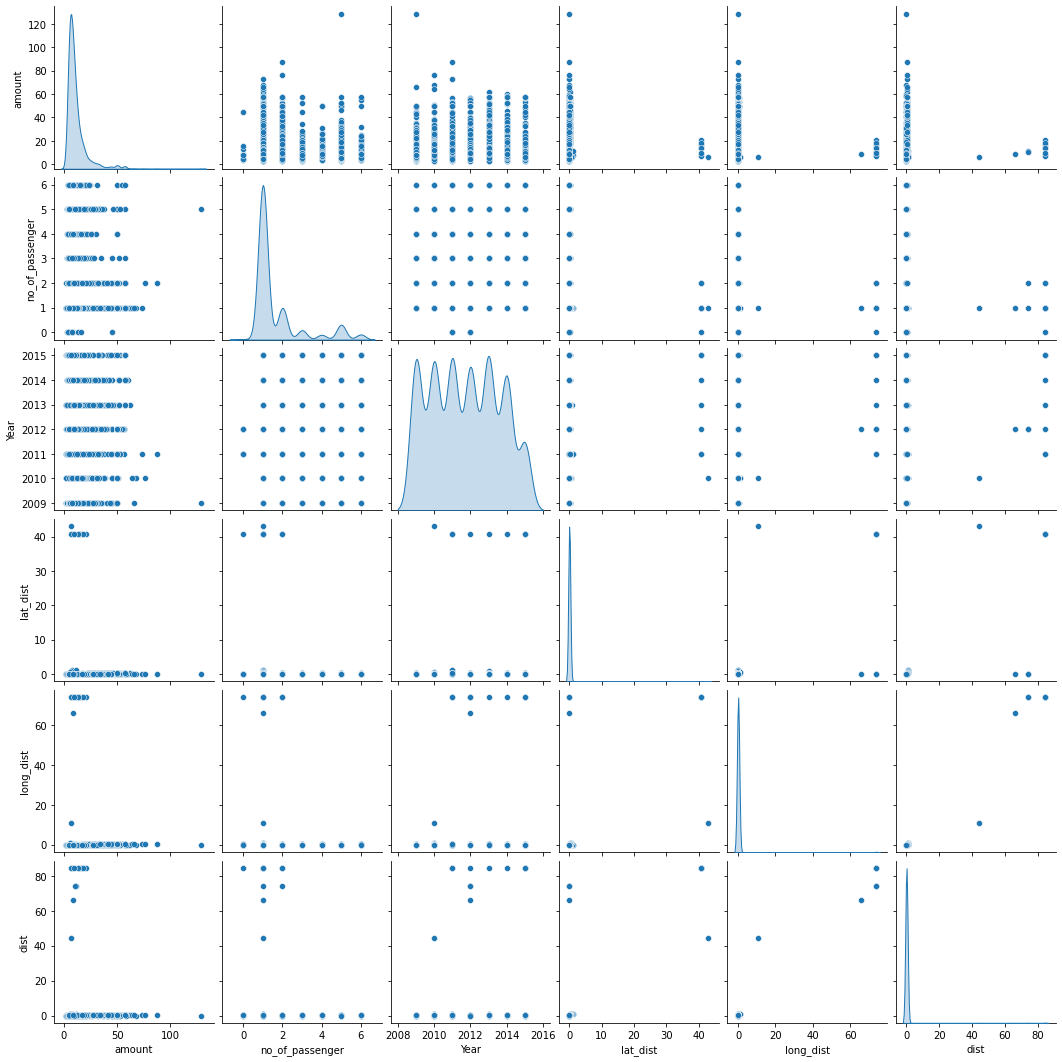

In [47]:
sns.pairplot(df.sample(5000),diag_kind='kde')
plt.show()

In [19]:
corr = df.corr()
corr

,amount,no_of_passenger,Year,lat_dist,long_dist,dist
amount,1.000000,0.016562,0.121032,0.009505,0.016777,0.014064
no_of_passenger,0.016562,1.000000,0.006372,-0.004853,-0.005655,-0.005971
Year,0.121032,0.006372,1.000000,0.014522,0.022081,0.019127
lat_dist,0.009505,-0.004853,0.014522,1.000000,0.662280,0.915477
long_dist,0.016777,-0.005655,0.022081,0.662280,1.000000,0.900212
dist,0.014064,-0.005971,0.019127,0.915477,0.900212,1.000000


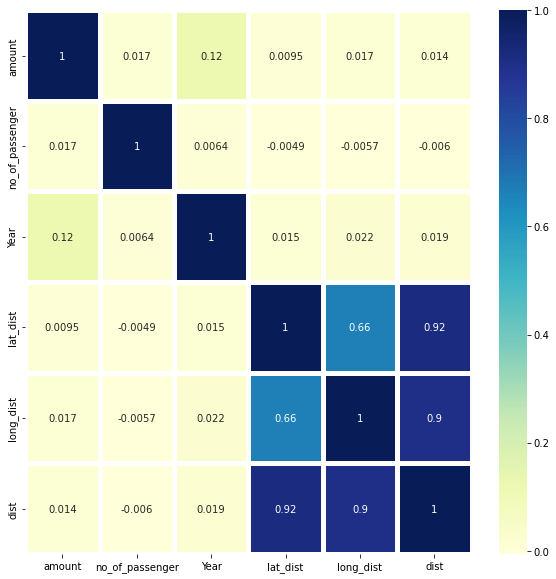

In [20]:
plt.figure(figsize = (10,10))
sns.heatmap(corr,annot=True,cmap="YlGnBu",linewidths=5)
plt.show()

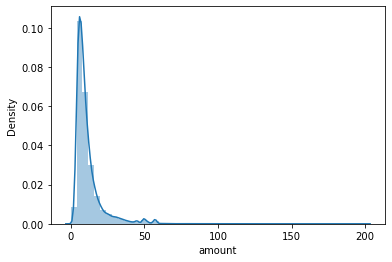

In [21]:
sns.distplot(df['amount'])
plt.show()

In [22]:
x = df.drop('amount',axis = 1)
y = df['amount']

### Creating models

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [24]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [25]:
lr.score(x_train,y_train)

0.01541911288432396

In [26]:
lr.score(x_test,y_test)

0.013724450156519796

In [27]:
dr = DecisionTreeRegressor(max_depth=7)
dr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=7)

In [28]:
dr.score(x_train,y_train)

0.7771873180359438

In [29]:
dr.score(x_test,y_test)

0.760936558813534

In [42]:
rf = RandomForestRegressor(max_depth=6)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=6)

In [43]:
rf.score(x_train,y_train)

0.7748187014556034

In [44]:
rf.score(x_test,y_test)

0.7712274456946917

In [33]:
ar = AdaBoostRegressor(n_estimators=4)
ar.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=4)

In [34]:
ar.score(x_train,y_train)

0.6540481468054389

In [35]:
ar.score(x_test,y_test)

0.6506120963616799

In [36]:
gr = GradientBoostingRegressor(n_estimators=150)
gr.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=150)

In [37]:
gr.score(x_train,y_train)

0.7892560474605034

In [38]:
gr.score(x_test,y_test)

0.7751691468947863